In [1]:
import tifffile
import matplotlib.pyplot as plt


image_path = '/home/hosnydiab/code/hosnydiab/data-project-solarpanel/AerialImageDataset/train/images/austin1.tif'
image = tifffile.imread(image_path)
image



array([[[123, 127, 121],
        [124, 128, 123],
        [124, 126, 121],
        ...,
        [103,  99,  90],
        [113, 110,  99],
        [108, 108,  95]],

       [[125, 129, 124],
        [126, 131, 127],
        [124, 127, 123],
        ...,
        [105, 102,  93],
        [113, 110,  96],
        [108, 108,  94]],

       [[124, 128, 124],
        [124, 127, 123],
        [124, 126, 123],
        ...,
        [106, 104,  95],
        [115, 111,  97],
        [111, 109,  95]],

       ...,

       [[ 38,  47,  45],
        [ 27,  31,  27],
        [ 34,  38,  37],
        ...,
        [ 93,  90,  84],
        [ 43,  38,  34],
        [ 43,  34,  32]],

       [[ 36,  44,  43],
        [ 37,  44,  45],
        [ 44,  50,  54],
        ...,
        [ 44,  39,  32],
        [ 43,  40,  37],
        [ 41,  35,  30]],

       [[ 37,  44,  44],
        [ 50,  59,  64],
        [ 42,  48,  50],
        ...,
        [ 41,  39,  34],
        [ 40,  37,  33],
        [ 83,  75,  73]]

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box


In [3]:
# Define the bounding box coordinates
xmin, ymin, xmax, ymax = [0, 0, image.shape[1], image.shape[0]]

# Create a GeoDataFrame with a single row and the bounding box as the geometry
bounding_box = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs='EPSG:4326')


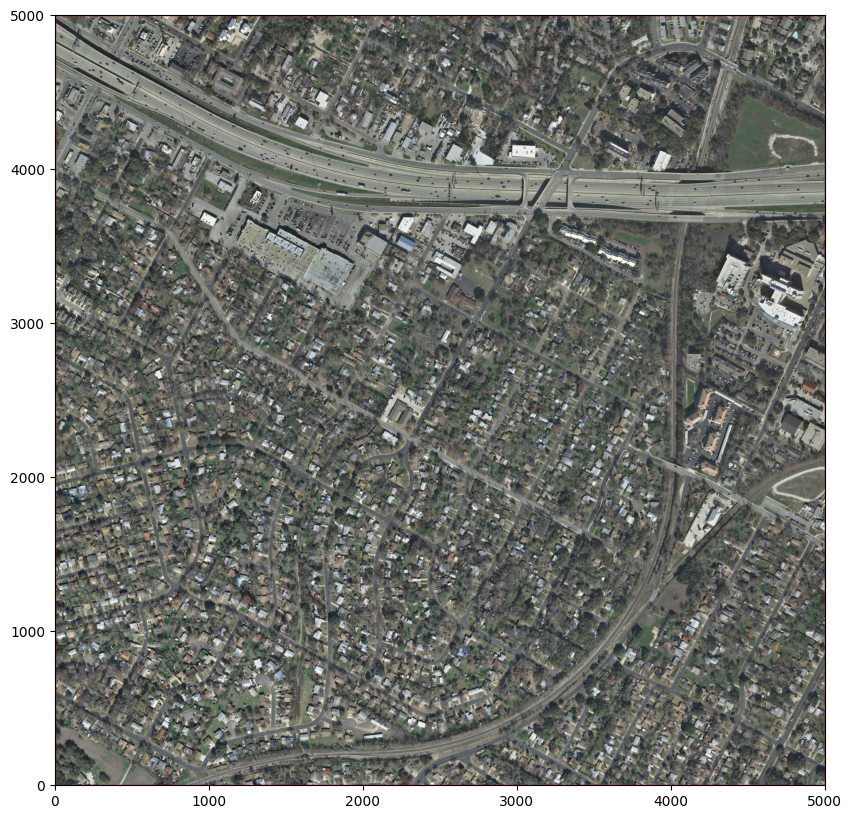

In [4]:
# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the GeoDataFrame with the bounding box
bounding_box.plot(ax=ax, facecolor='none', edgecolor='red')

# Plot the image
plt.imshow(image, cmap='gray', extent=[xmin, xmax, ymin, ymax])

# Set the aspect ratio to 'equal' to maintain the correct image proportions
ax.set_aspect('equal')

# Display the plot
plt.show()


In [5]:
from PIL import Image

# Open the image
image = Image.open(image_path)

# Get the resolution
width, height = image.size

# Print the resolution
print("Image resolution - Width:", width, "pixels, Height:", height, "pixels")


Image resolution - Width: 5000 pixels, Height: 5000 pixels


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

In [8]:
import cv2

# Image path
image_path = '/home/hosnydiab/code/hosnydiab/data-project-solarpanel/AerialImageDataset/train/images/austin1.tif'

# Load the image
image = cv2.imread(image_path)

# Get the shape of the image
image_shape = image.shape

# Print the shape of the image
print("Image shape:", image_shape)


Image shape: (5000, 5000, 3)


In [9]:
# Adjust the contrast of the RGB image using histogram equalization
equalized_image = exposure.equalize_adapthist(image)

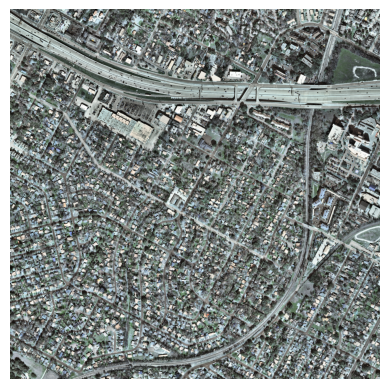

In [10]:
plt.imshow(equalized_image)
plt.axis('off')
plt.show()
#Display the equalized image to explore the color palette

In [11]:
red_band = image[:, :, 0] #Isolate the desired bands
green_band = image[:, :, 1]
blue_band = image[:, :, 2]

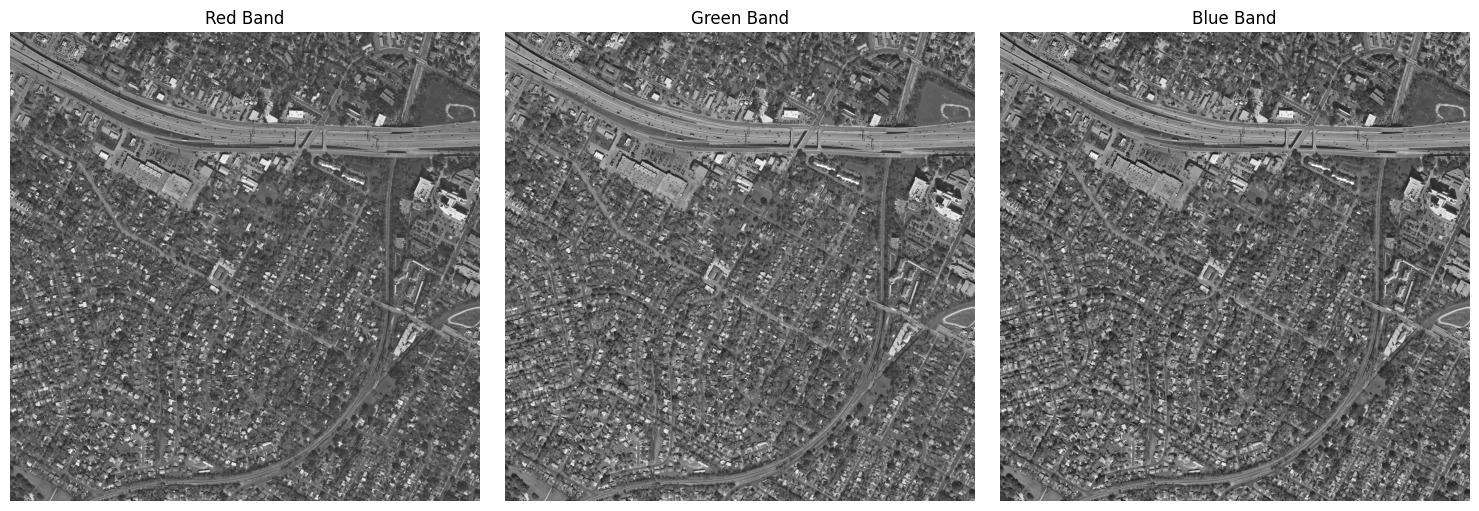

In [12]:
#Display the isolated bands
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(red_band, cmap='gray')
ax1.set_title('Red Band')
ax1.axis('off')
ax2.imshow(green_band, cmap='gray')
ax2.set_title('Green Band')
ax2.axis('off')
ax3.imshow(blue_band, cmap='gray')
ax3.set_title('Blue Band')
ax3.axis('off')
plt.tight_layout()
plt.show()


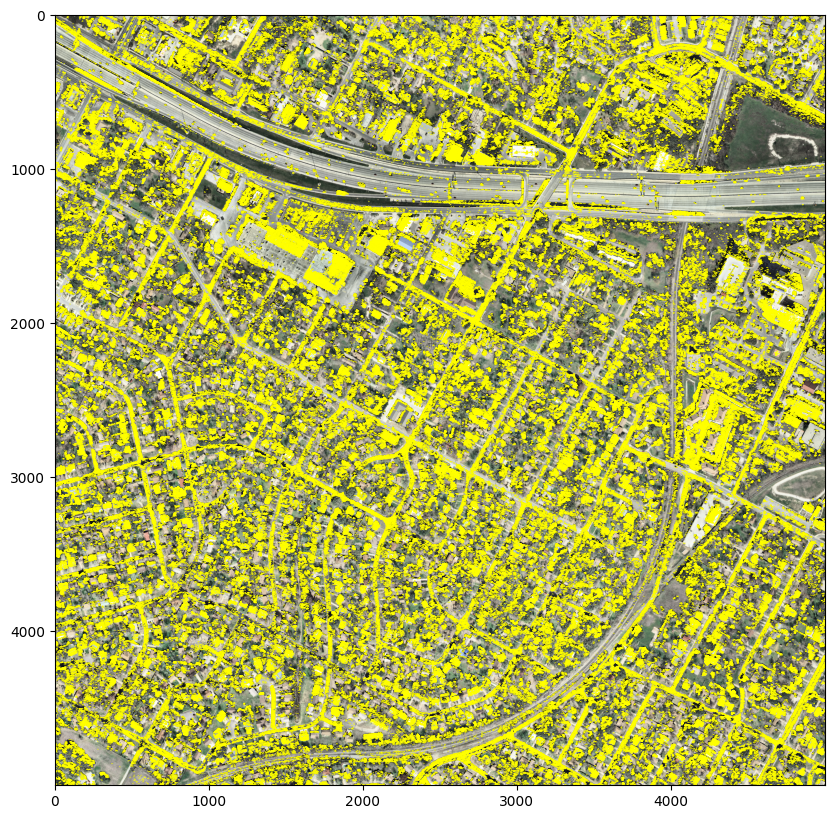

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from skimage import color, io, measure

# Load the equalized image from the specified path
image_path = '/home/hosnydiab/code/hosnydiab/data-project-solarpanel/AerialImageDataset/equalized_images/train_eq/austin/austin1_eq.png'
image = io.imread(image_path)

# Convert the image to the HSV color space
hsv_image = color.rgb2hsv(image)

# Define the hue threshold for rooftop identification
hue_threshold = 0.55  # Hue value corresponding to #DEE9EF

# Create a mask for rooftops based on hue threshold
roof_mask = np.abs(hsv_image[..., 0] - hue_threshold) < 0.01

# Find contours of the rooftop mask
contours = measure.find_contours(roof_mask, 0.5)

# Create a list to store rooftop polygons
polygon_list = []
for contour in contours:
    polygon = Polygon(contour[:, ::-1])
    polygon_list.append(polygon)

# Create a GeoDataFrame with the rooftop polygons
roof_gdf = gpd.GeoDataFrame(geometry=polygon_list, crs='EPSG:4326')

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the image
plt.imshow(image)

# Plot the rooftop polygons in yellow
roof_gdf.plot(ax=ax, facecolor='none', edgecolor='yellow')

# Set the aspect ratio to 'equal' to maintain the correct image proportions
ax.set_aspect('equal')

# Enable interactive zooming
plt.interactive(True)

# Display the plot
plt.show()


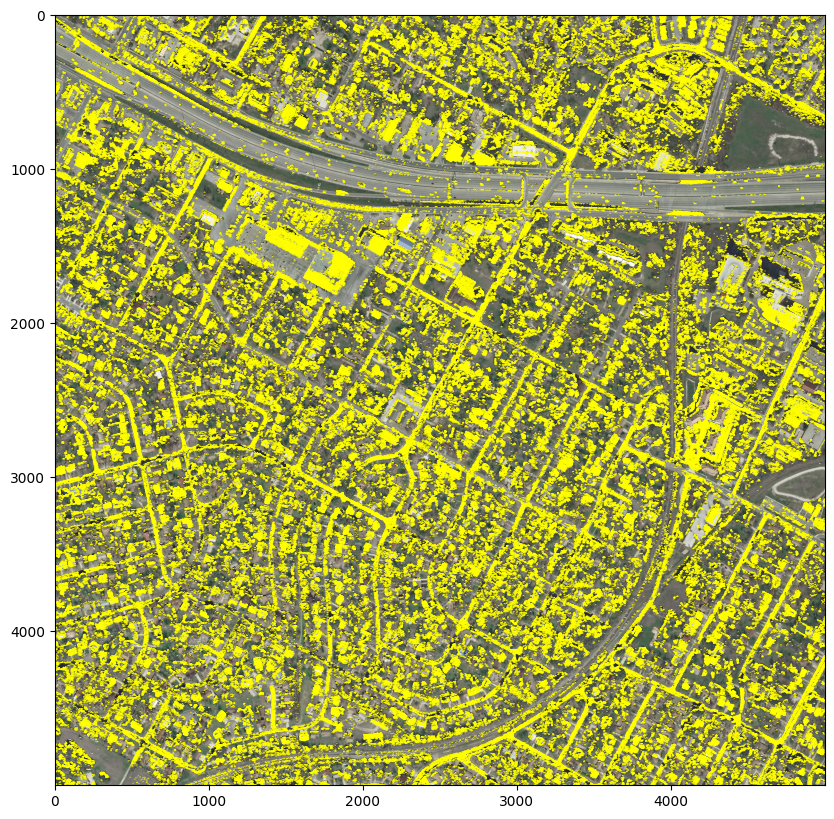

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon
from skimage import color, io, measure

# Load the equalized image from the specified path
image_path = '/home/hosnydiab/code/hosnydiab/data-project-solarpanel/AerialImageDataset/train/images/austin1.tif'
image = io.imread(image_path)

# Convert the image to the HSV color space
hsv_image = color.rgb2hsv(image)

# Define the hue threshold for rooftop identification
hue_threshold = 0.55  # Hue value corresponding to #DEE9EF

# Create a mask for rooftops based on hue threshold
roof_mask = np.abs(hsv_image[..., 0] - hue_threshold) < 0.01

# Find contours of the rooftop mask
contours = measure.find_contours(roof_mask, 0.5)

# Create a list to store rooftop polygons
polygon_list = []
for contour in contours:
    polygon = Polygon(contour[:, ::-1])
    polygon_list.append(polygon)

# Create a GeoDataFrame with the rooftop polygons
roof_gdf = gpd.GeoDataFrame(geometry=polygon_list, crs='EPSG:4326')

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the image
plt.imshow(image)

# Plot the rooftop polygons in yellow
roof_gdf.plot(ax=ax, facecolor='none', edgecolor='yellow')

# Set the aspect ratio to 'equal' to maintain the correct image proportions
ax.set_aspect('equal')

# Enable interactive zooming
plt.interactive(True)

# Display the plot
plt.show()


In [17]:
import tifffile
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.transform import from_origin


In [18]:
# Define the top-left corner coordinates
x = xmin
y = ymax

# Calculate the pixel size in x and y directions
pixel_size_x = (xmax - xmin) / image.shape[1]
pixel_size_y = (ymin - ymax) / image.shape[0]

# Create the transformation matrix
transform = from_origin(x, y, pixel_size_x, pixel_size_y)


In [19]:
import pyproj

# Create a GeoDataFrame with the image as a raster layer
geolocated_image = gpd.GeoDataFrame({'raster': [image]}, geometry=[box(xmin, ymin, xmax, ymax)])

# Set the CRS for the raster layer using EPSG code
crs_epsg = 'EPSG:32614'  # Austin CRS (UTM Zone 14N)
geolocated_image.crs = pyproj.CRS.from_string(crs_epsg)

# Alternatively, set the CRS using WKT representation
#crs_wkt = 'PROJCS["WGS 84 / UTM zone 14N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-99],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32614"]]'
#geolocated_image.crs = pyproj.CRS.from_string(crs_wkt)


In [20]:
import rasterio

# Open the TIFF image using rasterio
with rasterio.open(image_path) as dataset:
    # Access the image's georeferencing metadata
    transform = dataset.transform

    # Extract the upper-left corner coordinates (longitude, latitude)
    ul_longitude, ul_latitude = transform * (0, 0)

    # Extract the lower-right corner coordinates (longitude, latitude)
    lr_longitude, lr_latitude = transform * (dataset.width, dataset.height)

# Print the extracted latitude and longitude values
print("Upper-left corner coordinates:")
print("Latitude:", ul_latitude)
print("Longitude:", ul_longitude)

print("Lower-right corner coordinates:")
print("Latitude:", lr_latitude)
print("Longitude:", lr_longitude)


Upper-left corner coordinates:
Latitude: 3345000.0
Longitude: 616500.0
Lower-right corner coordinates:
Latitude: 3343499.9999999995
Longitude: 617999.9999999999


In [22]:
import pyproj
import folium

latitude = 3344250.0
longitude = 617250.0

# Define the source and target coordinate systems
source_crs = pyproj.CRS("EPSG:32614")  # UTM Zone 14N
target_crs = pyproj.CRS("EPSG:4326")  # EPSG code for WGS84, the coordinate system used by folium

# Create a coordinate transformation function
transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

# Transform the coordinates to the target coordinate system
transformed_longitude, transformed_latitude = transformer.transform(longitude, latitude)

map_center = [transformed_latitude, transformed_longitude]
m = folium.Map(location=map_center, zoom_start=12, tiles='Stamen Terrain')

marker = folium.Marker(location=map_center, popup='Image Location')
marker.add_to(m)

m


In [29]:
folder_path = '/home/hosnydiab/code/hosnydiab/data-project-solarpanel/AerialImageDataset/train/images'
m = folium.Map(location=[30.2500, -97.7500], zoom_start=12, tiles='Stamen Terrain')


In [30]:
import os

for filename in os.listdir(folder_path):
    if filename.endswith('.tif') and 'austin' in filename:
        # Open the image with rasterio
        image_path = os.path.join(folder_path, filename)
        dataset = rasterio.open(image_path)

        # Get the corner coordinates with rasterio
        ulx, uly, lrx, lry = dataset.bounds.left, dataset.bounds.top, dataset.bounds.right, dataset.bounds.bottom

        # Define the source and target coordinate systems
        source_crs = dataset.crs
        target_crs = pyproj.CRS("EPSG:4326")  # UTM Zone 14N

        # Create a coordinate transformation function
        transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

        # Transform the corner coordinates to the target coordinate system
        ul_transformed_longitude, ul_transformed_latitude = transformer.transform(ulx, uly)
        lr_transformed_longitude, lr_transformed_latitude = transformer.transform(lrx, lry)

        # Create the polygon coordinates
        polygon_coords = [
            [ul_transformed_latitude, ul_transformed_longitude],
            [lr_transformed_latitude, ul_transformed_longitude],
            [lr_transformed_latitude, lr_transformed_longitude],
            [ul_transformed_latitude, lr_transformed_longitude]
        ]

        # Create a Polygon object
        polygon = Polygon(polygon_coords)

        # Create a folium polygon and add it to the map
        folium.Polygon(locations=polygon_coords, color='blue', fill=True, fill_opacity=0.3).add_to(m)

m

In [31]:
import folium
import rasterio
from shapely.geometry import Polygon
import pyproj
import os
m = folium.Map(location=[30.2500, -97.7500], zoom_start=12, tiles='Stamen Terrain')

colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'yellow', 'brown', 'cyan', 'magenta',
          'lime', 'indigo', 'teal', 'olive', 'navy', 'maroon', 'aqua', 'silver', 'gray', 'fuchsia',
          'limegreen', 'darkorange', 'slateblue', 'darkkhaki', 'darkorchid', 'deepskyblue',
          'coral', 'dodgerblue', 'gold', 'hotpink', 'indianred', 'lawngreen', 'lightblue', 'lightgray']

for i in range(1, 37):
    filename = f'austin{i}.tif'
    image_path = os.path.join(folder_path, filename)
    if os.path.isfile(image_path):
        dataset = rasterio.open(image_path)
        ulx, uly, lrx, lry = dataset.bounds.left, dataset.bounds.top, dataset.bounds.right, dataset.bounds.bottom

        source_crs = dataset.crs
        target_crs = pyproj.CRS("EPSG:4326")  # EPSG code for WGS84, the coordinate system used by folium

        transformer = pyproj.Transformer.from_crs(source_crs, target_crs, always_xy=True)

        ul_transformed_longitude, ul_transformed_latitude = transformer.transform(ulx, uly)
        lr_transformed_longitude, lr_transformed_latitude = transformer.transform(lrx, lry)

        polygon_coords = [
            [ul_transformed_latitude, ul_transformed_longitude],
            [lr_transformed_latitude, ul_transformed_longitude],
            [lr_transformed_latitude, lr_transformed_longitude],
            [ul_transformed_latitude, lr_transformed_longitude]
        ]

        polygon = Polygon(polygon_coords)

        color = colors[i % len(colors)]  # Get a different color for each image

        folium.Polygon(locations=polygon_coords, color=color, fill=True, fill_opacity=0.3).add_to(m)

m
